# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
display(heroes_df.head(10))
powers_df = pd.read_csv('super_hero_powers.csv')
display(powers_df.head(10))

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,Absorbing Man,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Monroe,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
Unnamed: 0    734 non-null int64
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [4]:
heroes_df.drop(columns = ['Unnamed: 0'], inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
display(heroes_df.describe())
display(powers_df.describe())

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Joker,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [6]:
# Here I will first take a look at the dataframe to see how many missing values
# there are, and which rows and columns they are in to make an effective strategy
# for resolving them:

In [7]:
display(heroes_df.isna().sum())
display(heroes_df.info())

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


None

In [8]:
# Because there are 15 values missing for Publisher, I will impute these values with
# the forward fill method.

In [9]:
heroes_df['Publisher'].fillna( method ='ffill', inplace = True)
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        2
dtype: int64

In [10]:
# I will impute the median of Weight values for the two missing values.

In [11]:
heroes_df['Weight'] = heroes_df['Weight'].fillna(heroes_df['Weight'].median())
heroes_df.isna().sum()
# Now there are no missing values in this dataframe, great!

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [12]:
# Now let's take a look at the powers dataframe in the same way.
# First lets look at the amount of n/a's and where they are:

In [13]:
display(powers_df.isna().sum())
display(powers_df.info())

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

In [14]:
display(powers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

In [15]:
powers_df.isna().any().any()

False

In [16]:
# There are no missing values so there is no need to handle any

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [17]:
# I have chosen the default left join here, however I need to check for duplicate
# values, and fix the name/ hero_names columns. Let's begin.

joined_heroes = heroes_df.join(powers_df)
display(joined_heroes.head())
pd.set_option('display.max_columns', None)
print(joined_heroes.columns.values)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


['name' 'Gender' 'Eye color' 'Race' 'Hair color' 'Height' 'Publisher'
 'Skin color' 'Alignment' 'Weight' 'hero_names' 'Agility'
 'Accelerated Healing' 'Lantern Power Ring' 'Dimensional Awareness'
 'Cold Resistance' 'Durability' 'Stealth' 'Energy Absorption' 'Flight'
 'Danger Sense' 'Underwater breathing' 'Marksmanship' 'Weapons Master'
 'Power Augmentation' 'Animal Attributes' 'Longevity' 'Intelligence'
 'Super Strength' 'Cryokinesis' 'Telepathy' 'Energy Armor' 'Energy Blasts'
 'Duplication' 'Size Changing' 'Density Control' 'Stamina' 'Astral Travel'
 'Audio Control' 'Dexterity' 'Omnitrix' 'Super Speed' 'Possession'
 'Animal Oriented Powers' 'Weapon-based Powers' 'Electrokinesis'
 'Darkforce Manipulation' 'Death Touch' 'Teleportation' 'Enhanced Senses'
 'Telekinesis' 'Energy Beams' 'Magic' 'Hyperkinesis' 'Jump' 'Clairvoyance'
 'Dimensional Travel' 'Power Sense' 'Shapeshifting' 'Peak Human Condition'
 'Immortality' 'Camouflage' 'Element Control' 'Phasing'
 'Astral Projection' 'Electrica

In [18]:
dupl_hero = heroes_df[heroes_df.duplicated()]
print(len(dupl_hero))
dupl_hero.head()

1


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [19]:
# So we have one duplicate in the heroes dataframe, let's drop this
heroes_df.drop_duplicates(subset='name', inplace=True)
# Reset index values
heroes_df.reset_index(drop=True, inplace=True)

In [20]:
# To fix the name/hero_names columns, let's rename hero_names
powers_df.rename(columns={'hero_names':'name'}, inplace=True)

In [21]:
powers_df  = powers_df.astype('str')

In [22]:
heroes_and_powers_df = heroes_df.set_index('name').join(powers_df.set_index('name'))
heroes_and_powers_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,F

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

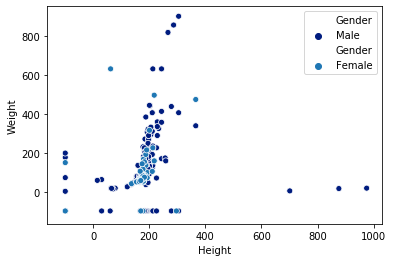

In [23]:
male_hero_df = heroes_and_powers_df[heroes_and_powers_df['Gender'] == 'Male']
female_hero_df = heroes_and_powers_df[heroes_and_powers_df['Gender'] == 'Female']

ax = sns.scatterplot(x='Height', y='Weight', hue=male_hero_df['Gender'], palette="dark", data=male_hero_df)
sns.scatterplot(x='Height', y='Weight', hue=female_hero_df['Gender'], data=female_hero_df, ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [24]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('{} Type of {} hero'.format(column_name,gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()

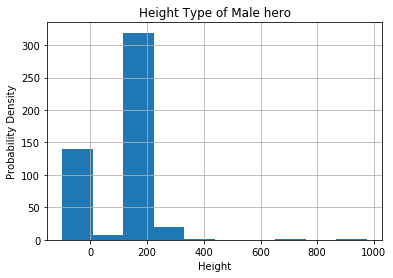

In [25]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')

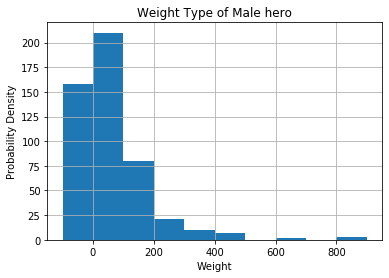

In [26]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')

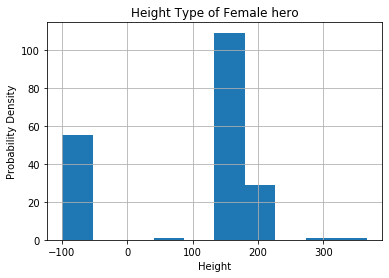

In [27]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')

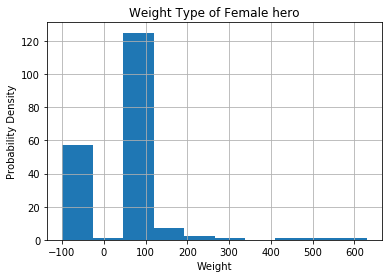

In [28]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')

In [29]:
print("Male Hero's Mean Height {}".format(male_heroes_df['Height'].mean()))
print(male_heroes_df['Height'].median())
print(male_heroes_df['Height'].mode())
print(male_heroes_df['Weight'].mean())
print(male_heroes_df['Weight'].median())
print(male_heroes_df['Weight'].mode())

Male Hero's Mean Height 109.11201629327903
180.0
0   -99.0
dtype: float64
53.55600814663951
79.0
0   -99.0
dtype: float64


In [30]:
print(female_heroes_df['Height'].mean())
print(female_heroes_df['Height'].median())
print(female_heroes_df['Height'].mode())
print(female_heroes_df['Weight'].mean())
print(female_heroes_df['Weight'].median())
print(female_heroes_df['Weight'].mode())

97.99234693877551
168.0
0   -99.0
dtype: float64
27.433673469387756
54.0
0   -99.0
dtype: float64


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



In [31]:
# Based on the graphs and statistics, the male heroes are on average a little taller
# and much heavier than the female heroes. This is in part to a few male
# outliers that are much bigger than the other heroes. There is a positive skew in
# both weight and height for the male and female heroes.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [33]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [34]:
powers_df.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [35]:
# Create a dataframe which contains all of the powers and values
power2 = powers_df.drop(columns='name')
power2.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [45]:
# How to get the value counts of the powers columns
type(power2['Agility'].value_counts()['True'])

numpy.int64

In [38]:
# Create a dictionary to assign the value counts and columns to
power_dict = {}

In [42]:
# Now there is a list with all of the columns of powers to iterate through
power_list = list(power2.columns)
type(power_list)
print(power_list)

['Agility', 'Accelerated Healing', 'Lantern Power Ring', 'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth', 'Energy Absorption', 'Flight', 'Danger Sense', 'Underwater breathing', 'Marksmanship', 'Weapons Master', 'Power Augmentation', 'Animal Attributes', 'Longevity', 'Intelligence', 'Super Strength', 'Cryokinesis', 'Telepathy', 'Energy Armor', 'Energy Blasts', 'Duplication', 'Size Changing', 'Density Control', 'Stamina', 'Astral Travel', 'Audio Control', 'Dexterity', 'Omnitrix', 'Super Speed', 'Possession', 'Animal Oriented Powers', 'Weapon-based Powers', 'Electrokinesis', 'Darkforce Manipulation', 'Death Touch', 'Teleportation', 'Enhanced Senses', 'Telekinesis', 'Energy Beams', 'Magic', 'Hyperkinesis', 'Jump', 'Clairvoyance', 'Dimensional Travel', 'Power Sense', 'Shapeshifting', 'Peak Human Condition', 'Immortality', 'Camouflage', 'Element Control', 'Phasing', 'Astral Projection', 'Electrical Transport', 'Fire Control', 'Projection', 'Summoning', 'Enhanced Memory', 

In [46]:
# Create a for loop to iterate through the new dataframe and impute the data
# into the newly made dictionary
for p in power_list:
    power_count = power2[p].value_counts()['True']
    power_dict[p] = power_count

In [47]:
print(power_dict)

{'Agility': 242, 'Accelerated Healing': 178, 'Lantern Power Ring': 11, 'Dimensional Awareness': 25, 'Cold Resistance': 47, 'Durability': 257, 'Stealth': 126, 'Energy Absorption': 77, 'Flight': 212, 'Danger Sense': 30, 'Underwater breathing': 21, 'Marksmanship': 119, 'Weapons Master': 105, 'Power Augmentation': 8, 'Animal Attributes': 25, 'Longevity': 113, 'Intelligence': 158, 'Super Strength': 360, 'Cryokinesis': 19, 'Telepathy': 92, 'Energy Armor': 8, 'Energy Blasts': 147, 'Duplication': 16, 'Size Changing': 55, 'Density Control': 15, 'Stamina': 289, 'Astral Travel': 4, 'Audio Control': 7, 'Dexterity': 6, 'Omnitrix': 1, 'Super Speed': 249, 'Possession': 8, 'Animal Oriented Powers': 40, 'Weapon-based Powers': 58, 'Electrokinesis': 22, 'Darkforce Manipulation': 10, 'Death Touch': 7, 'Teleportation': 72, 'Enhanced Senses': 89, 'Telekinesis': 61, 'Energy Beams': 42, 'Magic': 44, 'Hyperkinesis': 1, 'Jump': 65, 'Clairvoyance': 4, 'Dimensional Travel': 23, 'Power Sense': 3, 'Shapeshifting': 

In [57]:
#Sort through this dictionary to find those overall top 5 most common powers
sorted(power_dict.items(), key=lambda x: x[1], reverse=True)[:5]

[('Super Strength', 360),
 ('Stamina', 289),
 ('Durability', 257),
 ('Super Speed', 249),
 ('Agility', 242)]

In [58]:
# Let's create a function to find the top 5 most common powers for any dataframe
def top_5(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({'True': 1, 'False':0})
        
    power_counts_dict = dict(df.sum())
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5]

In [60]:
# Lets use the newly made function to find the 5 most common powers in Marvel Comics
marvel_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'Marvel Comics']
top_5(marvel_df)

[('Super Strength', 202.0),
 ('Durability', 151.0),
 ('Stamina', 148.0),
 ('Super Speed', 133.0),
 ('Agility', 124.0)]

In [61]:
# Lets use the newly made function to find the 5 most common powers in DC Comics
dc_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'DC Comics']
top_5(dc_df)

[('Super Strength', 105.0),
 ('Stamina', 85.0),
 ('Flight', 84.0),
 ('Super Speed', 77.0),
 ('Agility', 70.0)]

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
The data shows a bias towards the number of Marvel superheroes, or indicates that there are more powerful superheroes in the Marvel Universe than the DC Universe.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [ ]:
# Lets take a look at the relationship between the Heroes with 
# Animal Oriented Powers (40) 'Weapon-based Powers (58), Which Universe has more,
# are there heroes with both?

In [64]:
marvel_df['Animal Oriented Powers'].value_counts()['True']

28

In [65]:
marvel_df['Weapon-based Powers'].value_counts()['True']

33

In [66]:
dc_df['Animal Oriented Powers'].value_counts()['True']

11

In [67]:
dc_df['Weapon-based Powers'].value_counts()['True']

19

In [70]:
marvel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, A-Bomb to Ymir
Columns: 176 entries, Gender to Omniscient
dtypes: float64(2), object(174)
memory usage: 531.0+ KB


In [71]:
dc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, Abin Sur to Zoom
Columns: 176 entries, Gender to Omniscient
dtypes: float64(2), object(174)
memory usage: 293.2+ KB


In [72]:
# So we can see that there are more entries from the Marvel universe than the DC
# Universe, let's get the percentages of the animal oriented powers and weapon-based 
# powers for both universes.

In [81]:
animal_per_mar = marvel_df['Animal Oriented Powers'].value_counts()['True'] / len(marvel_df.index)
print('Percent of Animal Oriented powers in the Marvel Universe: {}'.format(animal_per_mar * 100))
weapons_per_mar = marvel_df['Weapon-based Powers'].value_counts()['True'] / len(marvel_df.index)
print('Percent of Weapon-based powers in the Marvel Universe: {}'.format(weapons_per_mar * 100))

Percent of Animal Oriented powers in the Marvel Universe: 7.291666666666667
Percent of Weapon-based powers in the Marvel Universe: 8.59375


In [82]:
# Now let's get the percentages for DC Comics
animal_per_dc = dc_df['Animal Oriented Powers'].value_counts()['True'] / len(dc_df.index)
print('Percent of Animal Oriented powers in the DC Universe: {}'.format(animal_per_dc * 100))
weapons_per_dc = dc_df['Weapon-based Powers'].value_counts()['True'] / len(dc_df.index)
print('Percent of Weapon-based powers in the DC Universe: {}'.format(weapons_per_dc * 100))

Percent of Animal Oriented powers in the DC Universe: 5.188679245283019
Percent of Weapon-based powers in the DC Universe: 8.962264150943396


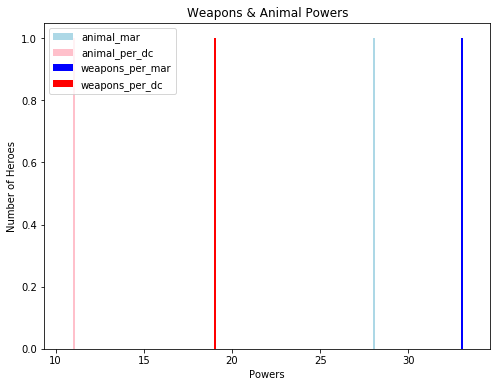

In [113]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot()
ax.hist(marvel_df['Animal Oriented Powers'].value_counts()['True'], color='lightblue')
ax.hist(dc_df['Animal Oriented Powers'].value_counts()['True'], color='pink')
ax.hist(marvel_df['Weapon-based Powers'].value_counts()['True'], color='blue')
ax.hist(dc_df['Weapon-based Powers'].value_counts()['True'], color='red')

plt.title('Weapons & Animal Powers')
plt.xlabel('Powers')
plt.ylabel('Number of Heroes')
labels = ['animal_mar', 'animal_per_dc', 'weapons_per_mar', 'weapons_per_dc']

plt.legend(labels)
plt.show()

SyntaxError: invalid syntax (<ipython-input-89-1e99c2ef8609>, line 2)

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data